<a href="https://colab.research.google.com/github/amirmohammadkalateh/hypertension_dataset/blob/main/hypertension_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Dataset Head:
   Age  Salt_Intake  Stress_Score       BP_History  Sleep_Duration   BMI  \
0   69          8.0             9           Normal             6.4  25.8   
1   32         11.7            10           Normal             5.4  23.4   
2   78          9.5             3           Normal             7.1  18.7   
3   38         10.0            10     Hypertension             4.2  22.1   
4   41          9.8             1  Prehypertension             5.8  16.2   

      Medication Family_History Exercise_Level Smoking_Status Has_Hypertension  
0            NaN            Yes            Low     Non-Smoker              Yes  
1            NaN             No            Low     Non-Smoker               No  
2            NaN             No       Moderate     Non-Smoker               No  
3  ACE Inhibitor             No            Low     Non-Smoker              Yes  
4          Other             No       Moderate     Non-Smoker               No  

Original Dataset Info:
<class 'pa

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)


Training the ANN model...
Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5864 - loss: 0.6736 - val_accuracy: 0.7673 - val_loss: 0.5698
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7870 - loss: 0.5367 - val_accuracy: 0.8113 - val_loss: 0.4406
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8007 - loss: 0.4287 - val_accuracy: 0.8428 - val_loss: 0.3657
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8370 - loss: 0.3682 - val_accuracy: 0.8616 - val_loss: 0.3660
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8394 - loss: 0.3679 - val_accuracy: 0.8931 - val_loss: 0.3075
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8547 - loss: 0.3152 - val_accuracy: 0.8553 - val_loss: 0.3969
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8607 - loss: 0.3056 - val_accuracy: 0.8805 - val_loss: 0.3137
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8776 - loss: 0.2812 - val

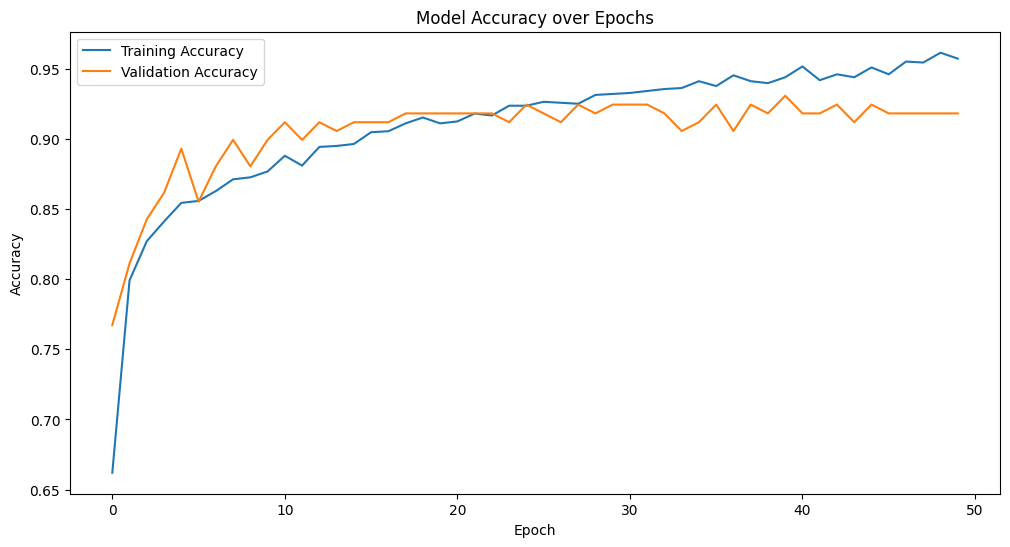

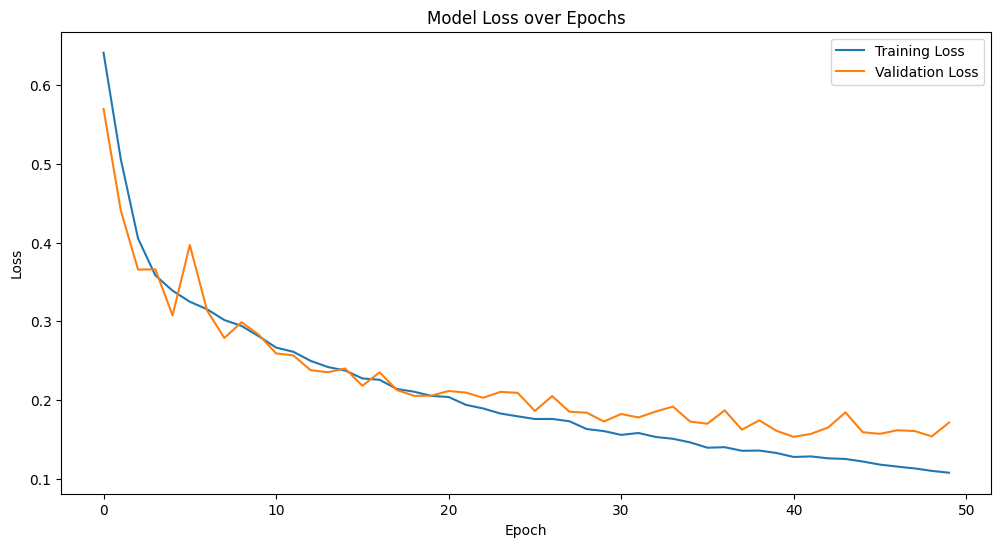

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
try:
    df = pd.read_csv('hypertension_dataset.csv')
except FileNotFoundError:
    print("Error: 'hypertension_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

print("Original Dataset Head:")
print(df.head())
print("\nOriginal Dataset Info:")
df.info()


categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target variable from categorical_cols if it's there
if 'Has_Hypertension' in categorical_cols:
    categorical_cols.remove('Has_Hypertension')

print(f"\nCategorical columns to encode: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"Encoded column '{col}' with classes: {le.classes_}")

# Encode the target variable 'Has_Hypertension' (Yes/No to 1/0)
le_target = LabelEncoder()
df['Has_Hypertension'] = le_target.fit_transform(df['Has_Hypertension'])
print(f"Encoded target 'Has_Hypertension' with classes: {le_target.classes_} (0 for No, 1 for Yes)")

print("\nDataset Head after Label Encoding:")
print(df.head())
print("\nDataset Info after Label Encoding:")
df.info()

# Separate features (X) and target (y)
X = df.drop('Has_Hypertension', axis=1)
y = df['Has_Hypertension']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nDataset Head after Scaling (numerical columns only):")
print(X_train.head())


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("\nANN Model Summary:")
model.summary()

# Train the model
print("\nTraining the ANN model...")
history = model.fit(
    X_train, y_train,
    epochs=50,          # Number of times to iterate over the entire dataset
    batch_size=32,      # Number of samples per gradient update
    validation_split=0.1, # Use 10% of training data for validation during training
    verbose=1           # Show progress during training
)

# Evaluate the model on the test data
print("\nEvaluating the model on test data...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int) # Convert probabilities to binary predictions (0 or 1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss over Epochs')
plt.legend()
plt.show()
